In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [4]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=42)
model.fit(data)


KMeans(n_clusters=3, random_state=42)

In [5]:
 model.cluster_centers_

array([[ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.59349593, 40.32520325, 44.15447154, 49.82926829],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])

In [6]:
X = data.iloc[:, :].values  # Age, Income, Money Spent

# Define different values of k
k_values = [2, 3, 4, 5]

# Perform k-means clustering for each k value and find centroids
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    print(f"Centroids for k={k}:")
    print(centroids)
    print()


Centroids for k=2:
[[ 0.56521739 46.16521739 59.36521739 32.88695652]
 [ 0.55294118 28.95294118 62.17647059 73.62352941]]

Centroids for k=3:
[[ 0.47368421 40.39473684 87.         18.63157895]
 [ 0.59349593 40.32520325 44.15447154 49.82926829]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]]

Centroids for k=4:
[[ 0.47368421 40.39473684 87.         18.63157895]
 [ 0.62105263 44.89473684 48.70526316 42.63157895]
 [ 0.5        24.82142857 28.71428571 74.25      ]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]]

Centroids for k=5:
[[ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.48648649 40.32432432 87.43243243 18.18918919]
 [ 0.58227848 43.12658228 54.82278481 49.83544304]
 [ 0.59090909 25.27272727 25.72727273 79.36363636]]



In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['Clusters']=kmeans.predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [30]:
data['Clusters']

0      1
1      1
2      1
3      1
4      1
      ..
195    2
196    0
197    2
198    0
199    2
Name: Clusters, Length: 200, dtype: int32

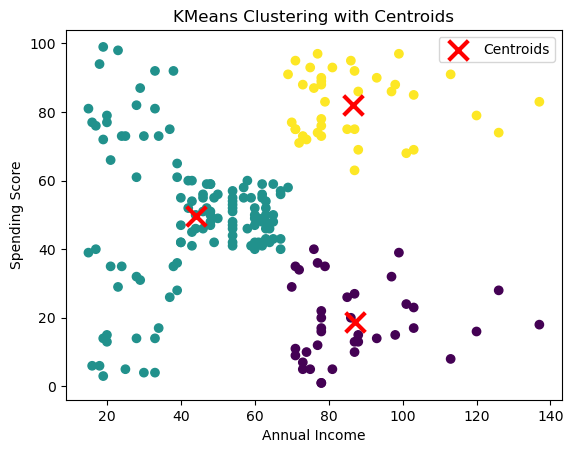

In [31]:
# Visualize the clusters and centroids
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Clusters'], cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=200, linewidths=3, color='r', label="Centroids")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering with Centroids')
plt.legend()
plt.show()

C:\Users\debom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


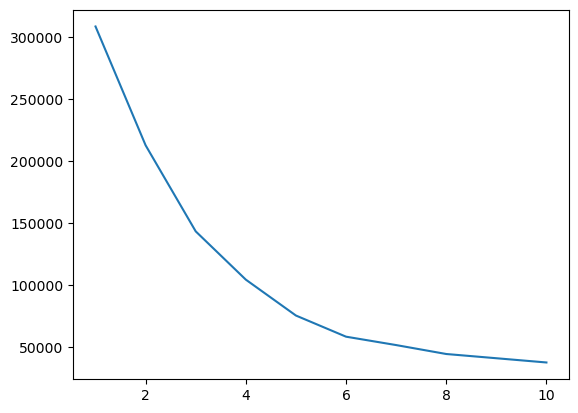

In [16]:
import seaborn as sns
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);